# 01a_ Introduction to atmospheric transparency

- author Sylvie Dagoret-Campagne
- creation date : 2023/02/21
- last verification : 2023/02/23

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'


In [2]:
from scipy import interpolate

## Imports dedicated to this work

- import the atmospheric transparency emulator (instead of using libradtran code).
- import the fit tools

- import rubin sim

In [3]:
from importlib.metadata import version
the_ver = version('atmosphtransmemullsst')
print(f"Version of atmosphtransmemullsst : {the_ver}")

Version of atmosphtransmemullsst : 0.0.1


In [4]:
import atmosphtransmemullsst
from atmosphtransmemullsst.simpleatmospherictransparencyemulator import SimpleAtmEmulator

emul = SimpleAtmEmulator(os.path.join(atmosphtransmemullsst.__path__[0],'../data/simplegrid'))

SimpleAtmEmulator:path=/Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid


In [5]:
WL = emul.GetWL()

In [6]:
import sys
sys.path.append('../lib')
import libAtmosphericFit

libAtmosphericFit.py :: Use atmosphtransmemullsst.__path__[0],'../data/simplegrid as the path to data
libAtmosphericFit.py :: data_path = /Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid
SimpleAtmEmulator:path=/Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid


In [7]:
from libPhotometricCorrections import *

libPhotometricCorrections.py :: Use atmosphtransmemullsst.__path__[0],'../data/simplegrid as the path to data
libPhotometricCorrections :: data_path = /Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid
SimpleAtmEmulator:path=/Users/dagoret/MacOSX/GitHub/LSST/atmosphtransmemullsst/atmosphtransmemullsst/../data/simplegrid


In [8]:
import rubin_sim.photUtils.Bandpass as Bandpass
import rubin_sim.photUtils.Sed as Sed
from rubin_sim.data import get_data_dir

## Configuration

In [9]:
am0 =1.20    # airmass
pwv0 = 5.0  # Precipitable water vapor vertical column depth in mm
oz0 = 300.  # Ozone vertical column depth in Dobson Unit (DU)
ncomp=1     # Number of aerosol components
tau0= 0.04 # Vertical Aerosol depth (VAOD) 
beta0 = -1# Aerosol Angstrom exponent

In [10]:
pc = PhotometricCorrections(am0,pwv0,oz0,ncomp,tau0,beta0)

Text(0.5, 1.0, 'Standard atmosphere transmission')

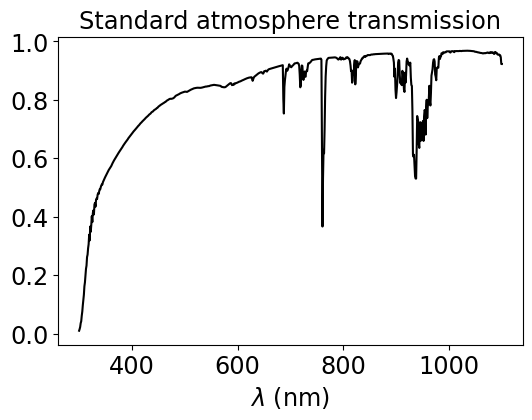

In [11]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_std,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Instrument throughput')

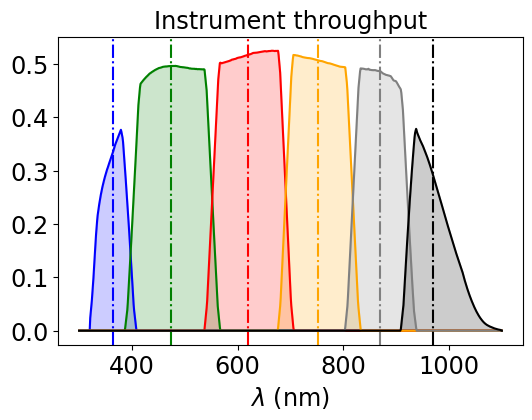

In [12]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_inst[f].wavelen,pc.bandpass_inst[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Instrument throughput")

Text(0.5, 1.0, 'Total filter throughput')

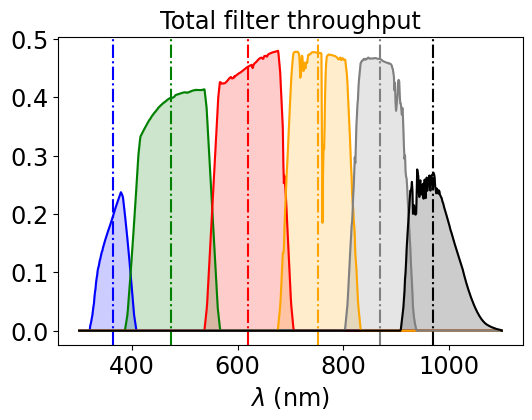

In [13]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_std[f].wavelen,pc.bandpass_total_std[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

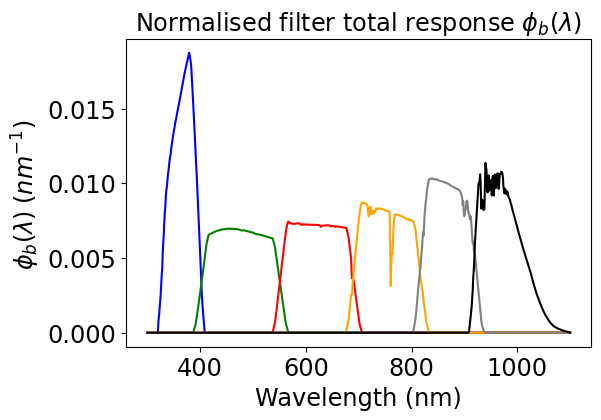

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_std[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [15]:
pc.all_II0_std

{'u': 0.03342769116035513,
 'g': 0.1221242504398316,
 'r': 0.10116768892516816,
 'i': 0.07750051493971546,
 'z': 0.05375682875091482,
 'y': 0.025892194834450773}

In [16]:
pc.all_II1_std

{'u': 2.3476762731276044,
 'g': 2.5482606447984644,
 'r': 0.9752671488769777,
 'i': 0.2935845227015852,
 'z': -0.5067377055362723,
 'y': 3.567503680789848}

In [17]:
am =2    # airmass
pwv = 5.0  # Precipitable water vapor vertical column depth in mm
oz = 300.  # Ozone vertical column depth in Dobson Unit (DU)
ncomp=1     # Number of aerosol components
tau= 0.04 # Vertical Aerosol depth (VAOD) 
beta = -1# Aerosol Angstrom exponent

In [18]:
pc.CalculateObs(am,pwv,oz,ncomp=ncomp,tau=tau,beta=beta)

Text(0.5, 1.0, 'Standard atmosphere transmission')

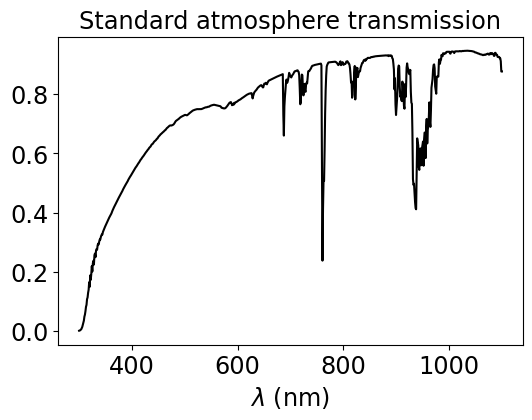

In [19]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
axs.plot(pc.WL,pc.atm_nonstd,'k-')
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Standard atmosphere transmission")

Text(0.5, 1.0, 'Total filter throughput')

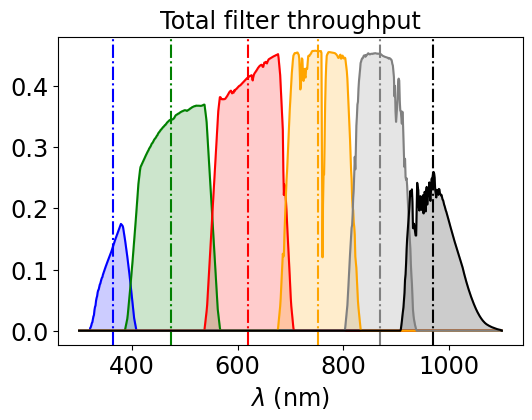

In [20]:
fig, axs = plt.subplots(1,1,figsize=(6,4))
# loop on filter
for index,f in enumerate(filter_tagnames):
    
    axs.plot(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index]) 
    axs.fill_between(pc.bandpass_total_nonstd[f].wavelen,pc.bandpass_total_nonstd[f].sb,color=filter_color[index],alpha=0.2) 
    axs.axvline(FILTERWL[index,2],color=filter_color[index],linestyle="-.")
    
axs.set_xlabel("$\\lambda$ (nm)")
axs.set_title("Total filter throughput")

Text(0.5, 1.0, 'Normalised filter total response $\\phi_b(\\lambda)$')

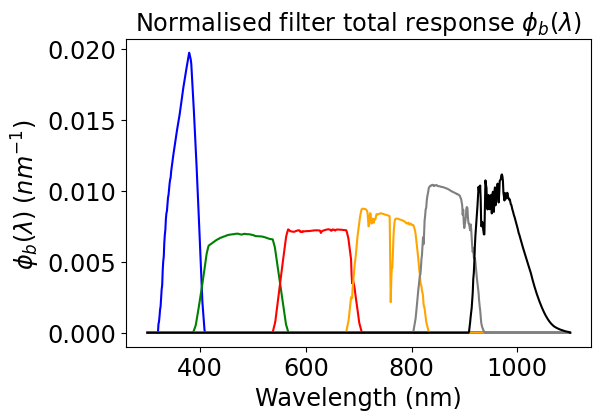

In [21]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
for index,f in enumerate(filter_tagnames):
    ax.plot(pc.WL,pc.phiArray_nonstd[index,:],'-',color=filter_color[index],label = f)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel("$\phi_b(\lambda)\; (nm^{-1})$ ")
ax.set_title("Normalised filter total response $\phi_b(\lambda)$")

In [22]:
pc.CalculateMultiObs(np.arange(1,2.5,0.2),pwv,oz,ncomp,tau,beta)